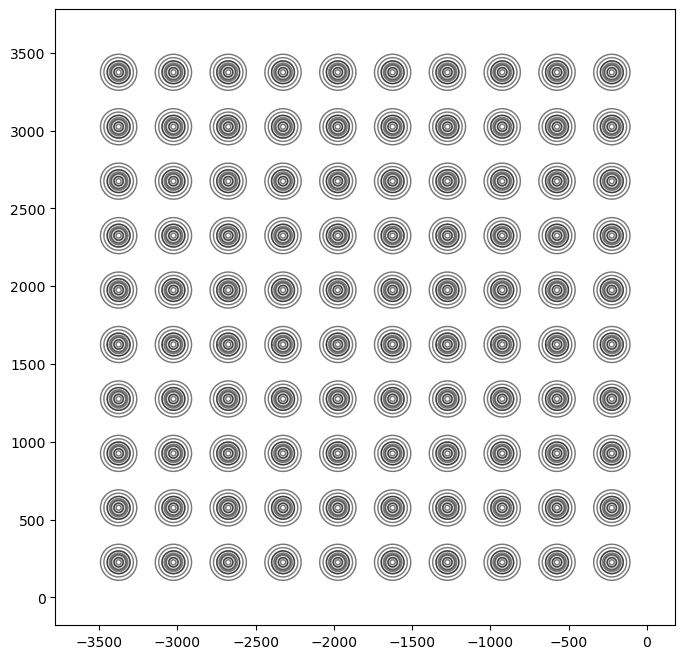

In [1]:
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def slice_stl(file_path, layer_height):
    # Load STL file
    stl_mesh = mesh.Mesh.from_file(file_path)
    facets = stl_mesh.vectors  # Extract triangle vertices
    
    # Determine Z bounds
    z_min = np.min(facets[:, :, 2])
    z_max = np.max(facets[:, :, 2])
    
    # Generate slicing planes
    z_levels = np.arange(z_min, z_max, layer_height)
    
    # Store slices
    slices = []
    for z in z_levels:
        layer_polygons = []
        for triangle in facets:
            intersections = intersect_plane_with_triangle(z, triangle)
            if intersections is not None:
                layer_polygons.append(intersections)
        slices.append((z, layer_polygons))
    
    return slices

def intersect_plane_with_triangle(z, triangle):
    """Find intersections of a horizontal plane with a triangle."""
    edges = [(triangle[i], triangle[(i+1) % 3]) for i in range(3)]
    points = []
    for p1, p2 in edges:
        if (p1[2] <= z and p2[2] >= z) or (p1[2] >= z and p2[2] <= z):
            t = (z - p1[2]) / (p2[2] - p1[2]) if p1[2] != p2[2] else 0
            intersect_point = p1 + t * (p2 - p1)
            points.append(intersect_point[:2])  # Only need X, Y
    if len(points) == 2:
        return points
    return None

def visualise_slices(slices):
    colours = plt.cm.viridis(np.linspace(0, 1, len(slices)))
    fig, ax = plt.subplots(figsize=(8, 8))
    for (z, polygons), colour in zip(slices, colours):
        patches = [Polygon(poly) for poly in polygons]
        p = PatchCollection(patches, facecolor=colour, edgecolor="black", alpha=0.6)
        ax.add_collection(p)
    ax.autoscale()
    plt.show()

# Usage example
file_path = "/home/a/Documents/3rd_Year/3YP/Code/attempt2/MN.stl"
layer_height = 100  # Example layer height
slices = slice_stl(file_path, layer_height)
visualise_slices(slices)
